# I will solve a classification task using a set of classification algorithms from scikit-learn (KNN, Decision Tree, Random Forest). I will also use Nested K-Fold Cross-Validation to obtain a more reliable estimate of model performance and select the best hyperparameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Credit score classification dataset

Source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification


- **Dataset:** Credit Score Dataset  
- **Content:** Customer demographic, financial, and credit history data.  
- **Number of Rows:** 100
- **Number of Columns:** 28  

| **No** | **INPUTS**                  | **Description**                                                                                  |
|-------|-----------------------------|--------------------------------------------------------------------------------------------------|
| 1     | **ID**                       | Unique identifier for each record.                                                               |
| 2     | **Customer_ID**              | Unique identifier for each customer.                                                             |
| 3     | **Month**                    | Month of the transaction or record.                                                              |
| 4     | **Name**                     | Customer’s name.                                                                                 |
| 5     | **Age**                      | The customer’s age.                                                                              |
| 6     | **SSN**                      | Customer’s social security number.                                                               |
| 7     | **Occupation**               | The customer’s occupation.                                                                       |
| 8     | **Annual_Income**            | The customer’s annual income.                                                                    |
| 9     | **Monthly_Inhand_Salary**    | The customer’s monthly take-home salary.                                                         |
| 10    | **Num_Bank_Accounts**        | Total number of bank accounts owned by the customer.                                            |
| 11    | **Num_Credit_Card**          | Total number of credit cards held by the customer.                                              |
| 12    | **Interest_Rate**            | The interest rate applied to loans or credits.                                                  |
| 13    | **Num_of_Loan**              | Number of loans the customer has taken.                                                          |
| 14    | **Type_of_Loan**             | Categories of loans obtained by the customer.                                                   |
| 15    | **Delay_from_due_date**      | The delay in payment relative to the due date.                                                 |
| 16    | **Num_of_Delayed_Payment**   | Total instances of late payments made by the customer.                                          |
| 17    | **Changed_Credit_Limit**     | Adjustments made to the customer’s credit limit.                                               |
| 18    | **Num_Credit_Inquiries**     | Number of inquiries made regarding the customer's credit.                                       |
| 19    | **Credit_Mix**               | The variety of credit types the customer uses (e.g., loans, credit cards).                     |
| 20    | **Outstanding_Debt**         | Total amount of debt the customer currently owes.                                              |
| 21    | **Credit_Utilization_Ratio** | Proportion of credit used compared to the total credit limit.                                   |
| 22    | **Credit_History_Age**       | Duration of the customer’s credit history.                                                      |
| 23    | **Payment_of_Min_Amount**    | Indicates if the customer pays the minimum required amount each month.                         |
| 24    | **Total_EMI_per_month**      | Total Equated Monthly Installment (EMI) paid by the customer.                                   |
| 25    | **Amount_invested_monthly**  | Monthly investment amount made by the customer.                                                 |
| 26    | **Payment_Behaviour**        | Customer’s payment habits and tendencies.                                                       |
| 27    | **Monthly_Balance**          | The remaining balance in the customer’s account at the end of each month.                      |
| 28    | **Credit_Score**             | The customer’s credit score (target variable: "Good," "Poor," "Standard").                     |


In [3]:
df = pd.read_csv("./credit_score_dataset.csv", low_memory=False)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.columns = [s.lower() for s in df.columns]

## Cleaning

In [6]:
df.duplicated().sum()

0

In [7]:
df["id"].duplicated().sum()

0

In [8]:
df.isna().sum()

,0
id,0
customer_id,0
month,0
name,9985
age,0
ssn,0
occupation,0
annual_income,0
monthly_inhand_salary,15002
num_bank_accounts,0


In [9]:
df.dtypes 

,0
id,object
customer_id,object
month,object
name,object
age,object
ssn,object
occupation,object
annual_income,object
monthly_inhand_salary,float64
num_bank_accounts,int64


### Age

In [10]:
df.age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [11]:
df["age"] = df["age"].str.strip("_") 
df["age"] = pd.to_numeric(df["age"], downcast="integer")

In [12]:
df.age.value_counts().sort_index().head(50)

,count
age,
-500,886
14,1175
15,1574
16,1455
17,1502
18,2385
19,2793
20,2744
21,2716


In [13]:
df.loc[(df["age"] < 14) | (df["age"] > 56), "age"] = pd.NA
df["age"] = df.groupby("customer_id")["age"].transform(lambda x: x.ffill().bfill())

### Occupation

In [14]:
df.groupby("customer_id")["occupation"].value_counts().head(30)

customer_id  occupation   
CUS_0x1000   Lawyer           8
CUS_0x1009   Mechanic         7
             _______          1
CUS_0x100b   Media_Manager    8
CUS_0x1011   Doctor           8
CUS_0x1013   Mechanic         8
CUS_0x1015   Journalist       8
CUS_0x1018   Accountant       8
CUS_0x1026   Manager          7
             _______          1
CUS_0x102d   Entrepreneur     7
             _______          1
CUS_0x102e   Scientist        8
CUS_0x1032   Lawyer           8
CUS_0x1037   Accountant       8
CUS_0x1038   Architect        8
CUS_0x103e   Scientist        8
CUS_0x1041   Teacher          8
CUS_0x1044   Entrepreneur     7
             _______          1
CUS_0x1048   Accountant       8
CUS_0x104a   Mechanic         8
CUS_0x104e   Teacher          7
             _______          1
CUS_0x104f   Architect        7
             _______          1
CUS_0x1051   Engineer         7
             _______          1
CUS_0x1056   Entrepreneur     8
CUS_0x1057   Writer           7
Name: count, dtype: int64

In [15]:
df["occupation"] = df.groupby("customer_id")["occupation"].transform(
    lambda x: x.where(x != "_______", x[x != "_______"].mode().iloc[0]))

### Annual_income

In [16]:
df[pd.to_numeric(df["annual_income"], errors="coerce").isna()]["annual_income"].head(20)

,annual_income
10,34847.84_
27,30689.89_
32,35547.71_
56,34081.38_
66,114838.41_
94,88640.24_
98,54392.16_
106,8701.545_
111,8701.545_
115,25546.26_


In [17]:
df["annual_income"] = df["annual_income"].str.strip("_")
df["annual_income"] = pd.to_numeric(df["annual_income"], downcast="integer")

### Monthly_inhand_salary

In [18]:
df["monthly_inhand_salary"] = df.groupby("customer_id")["monthly_inhand_salary"].transform(
    lambda x: x.ffill().bfill()
)

### Num_bank_accounts

In [19]:
df["num_bank_accounts"].value_counts().sort_index().head(20)

,count
num_bank_accounts,
-1,21
0,4328
1,4490
2,4304
3,11950
4,12186
5,12118
6,13001
7,12823


In [20]:
df.loc[(df["num_bank_accounts"] < 0) | (df["num_bank_accounts"] > 11), "num_bank_accounts", ] = pd.NA
df["num_bank_accounts"] = df.groupby("customer_id")["num_bank_accounts"].transform(
    lambda x: x.ffill().bfill()
)

### Num_credit_card

In [21]:
df["num_credit_card"].value_counts().sort_index().head(20)

,count
num_credit_card,
0,13
1,2132
2,2149
3,13277
4,14030
5,18459
6,16559
7,16615
8,4956


In [22]:
df.loc[df["num_credit_card"] > 11, "num_credit_card"] = pd.NA
df["num_credit_card"] = df.groupby("customer_id")["num_credit_card"].transform(
    lambda x: x.ffill().bfill()
)

### Interest rate

In [23]:
df.interest_rate.value_counts().sort_index().tail(50)

,count
interest_rate,
5663,1
5670,2
5671,1
5672,1
5676,1
5677,1
5682,1
5686,1
5694,1


In [24]:
df.loc[df["interest_rate"] > 34, "interest_rate"] = pd.NA
df["interest_rate"] = df.groupby("customer_id")["interest_rate"].transform(
    lambda x: x.fillna(x.mode()[0])
)

### Num_of_loan

In [25]:
df[pd.to_numeric(df["num_of_loan"], errors="coerce").isna()]["num_of_loan"].head(20)

,num_of_loan
37,0_
80,3_
84,3_
94,2_
119,5_
125,2_
131,0_
144,0_
158,5_
256,2_


In [26]:
df["num_of_loan"] = df["num_of_loan"].str.strip("_")
df["num_of_loan"] = pd.to_numeric(df["num_of_loan"], downcast="integer")

In [27]:
df.loc[(df["num_of_loan"] < 0) | (df["num_of_loan"] > 9), "num_of_loan"] = pd.NA
df["num_of_loan"] = df.groupby("customer_id")["num_of_loan"].transform(lambda x: x.ffill().bfill())

### Type_of_loan

In [28]:
df.loc[df["num_of_loan"] == 0, "type_of_loan"] = "No Loan"
df["type_of_loan"] = df["type_of_loan"].str.replace(" and", "", regex=False)
df["type_of_loan"] = df["type_of_loan"].str.split(", ")

### Num_of_delayed_payment

In [29]:
df[pd.to_numeric(df["num_of_delayed_payment"],
                  errors="coerce").isna()]["num_of_delayed_payment"].head(20)

,num_of_delayed_payment
1,NaN
4,NaN
6,8_
11,3_
30,NaN
32,NaN
33,NaN
53,3_
54,2_
70,NaN


In [30]:
df["num_of_delayed_payment"] = df["num_of_delayed_payment"].str.strip("_")

df["num_of_delayed_payment"] = pd.to_numeric(df["num_of_delayed_payment"],
                                              downcast="integer")

In [31]:
df.loc[(df["num_of_delayed_payment"] < 0) | (df["num_of_delayed_payment"] > 28), "num_of_delayed_payment"] = np.nan
df["num_of_delayed_payment"] = df.groupby("customer_id")["num_of_delayed_payment"].transform(
    lambda x: x.ffill().bfill()
)

### Changed_credit_limit

In [32]:
df[pd.to_numeric(df["changed_credit_limit"],
                  errors="coerce").isna()]["changed_credit_limit"].sample(20)

,changed_credit_limit
37506,_
43319,_
11508,_
15137,_
11033,_
55665,_
99160,_
70808,_
92243,_
73171,_


In [33]:
df.loc[(df["changed_credit_limit"] == "_"), "changed_credit_limit"] = np.nan
df["changed_credit_limit"] = df.groupby("customer_id")["changed_credit_limit"].transform(
    lambda x: x.ffill().bfill()
)

In [34]:
df["changed_credit_limit"] = pd.to_numeric(df["changed_credit_limit"], downcast="float").round(3)

### Num_credit_inquiries

In [35]:
df["num_credit_inquiries"].value_counts(dropna=False).head(30)

,count
num_credit_inquiries,
4.0,11271
3.0,8890
6.0,8111
7.0,8058
2.0,8028
8.0,7866
1.0,7588
0.0,6972
5.0,5693


In [36]:
df.loc[(df["num_credit_inquiries"] > 17), "num_credit_inquiries"] = pd.NA
df["num_credit_inquiries"] = df.groupby("customer_id")["num_credit_inquiries"].transform(
    lambda x: x.ffill().bfill()
)

### Credit_mix

In [37]:
df.groupby(["customer_id"])["credit_mix"].value_counts().head(20)

customer_id  credit_mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
             _             1
CUS_0x1015   Standard      8
CUS_0x1018   Bad           6
             _             2
CUS_0x1026   Good          6
             _             2
CUS_0x102d   Good          7
             _             1
CUS_0x102e   Standard      6
             _             2
CUS_0x1032   Standard      8
CUS_0x1037   Good          7
             _             1
Name: count, dtype: int64

In [38]:
df.loc[df["credit_mix"] == "_", "credit_mix"] = pd.NA
df["credit_mix"] = df.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

### Outstanding_debt

In [39]:
df[pd.to_numeric(df["outstanding_debt"], errors="coerce").isna()]["outstanding_debt"].head(20)

,outstanding_debt
87,1328.93_
142,1283.37_
368,2797.17_
632,3818.57_
703,343.84_
731,363.51_
782,404.51_
819,1755.81_
835,2593.44_
992,89.62_


In [40]:
df["outstanding_debt"] = df["outstanding_debt"].str.strip("_")
df["outstanding_debt"] = pd.to_numeric(df["outstanding_debt"], downcast="float")

### Credit_utilization_ratio

This seems fine!

In [41]:
df.credit_utilization_ratio.value_counts().sort_values().head(20)

,count
credit_utilization_ratio,
26.822620,1
22.537593,1
23.933795,1
24.464031,1
38.550848,1
33.224951,1
39.182656,1
34.977895,1
33.381010,1


In [42]:
df.credit_utilization_ratio.value_counts().sort_values().tail(20)

,count
credit_utilization_ratio,
22.895966,1
39.772607,1
24.713861,1
30.614953,1
24.540510,1
28.508250,1
25.123535,1
37.140784,1
32.991333,1


### Payment_of_min_amount

This seems fine!

In [43]:
df.payment_of_min_amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

### Amount_invested_monthly

In [44]:
df[pd.to_numeric(df["amount_invested_monthly"],errors="coerce").isna()]["amount_invested_monthly"].value_counts(dropna=False)

,count
amount_invested_monthly,
NaN,4479
__10000__,4305


In [45]:
df["amount_invested_monthly"] = df["amount_invested_monthly"].str.strip("_")
df["amount_invested_monthly"] = pd.to_numeric(df["amount_invested_monthly"], downcast="float")

### Total_emi_per_month

The value of `total_emi_per_month` is typically around 30%-40% of the monthly income. So we are going to fix those that are above this threshold.

In [46]:
df.loc[df["total_emi_per_month"] > df["monthly_inhand_salary"] * 0.3].count()

,0
id,3146
customer_id,3146
month,3146
name,2853
age,3146
ssn,3146
occupation,3146
annual_income,3146
monthly_inhand_salary,3146
num_bank_accounts,3146


In [47]:
df.loc[df["total_emi_per_month"] > df["monthly_inhand_salary"] * 0.3, "total_emi_per_month"] = np.nan
df["total_emi_per_month"] = df.groupby("customer_id")["total_emi_per_month"].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

### Amount_invested_monthly

In [48]:
df.groupby("customer_id")["amount_invested_monthly"].apply(
    lambda x: x.isna().all()).sum()

0

In [49]:
df["amount_invested_monthly"] = df.groupby("customer_id")["amount_invested_monthly"].transform(
    lambda x: x.ffill().bfill()
)

### Payment_behaviour

In [50]:
df["payment_behaviour"].value_counts()

,count
payment_behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [51]:
df.loc[(df["payment_behaviour"] == "!@9#%8"), "payment_behaviour"] = np.nan

df["payment_behaviour"] = df.groupby("customer_id")["payment_behaviour"].transform(
    lambda x: x.ffill().bfill()
)

### Monthly_balance

In [52]:
df[pd.to_numeric(df["monthly_balance"], errors="coerce").isna()]["monthly_balance"].value_counts(dropna=False)

,count
monthly_balance,
NaN,1200
__-333333333333333333333333333__,9


In [53]:
df['monthly_balance'] = df['monthly_balance'].apply(
    lambda x: x.replace('_', '').replace('-', '') if isinstance(x, str) else x
)

In [54]:
df["monthly_balance"] = df["monthly_balance"].astype('float')

In [55]:
df["monthly_balance"].nlargest(10)

,monthly_balance
5545,3.333333e+26
26177,3.333333e+26
29158,3.333333e+26
35570,3.333333e+26
38622,3.333333e+26
60009,3.333333e+26
75251,3.333333e+26
82918,3.333333e+26
83255,3.333333e+26
9376,1.602041e+03


In [56]:
mask = df["monthly_balance"] > 3.3e22

df.loc[mask, "monthly_balance"] = df.loc[mask, "customer_id"].map(
    df[df["monthly_balance"] <  3.3e22].groupby("customer_id")["monthly_balance"].mean()
)

In [57]:
df["monthly_balance"] = df.groupby(
    "customer_id")["monthly_balance"].transform(lambda x: x.fillna(x.mean()))

### Credit_score

This seems fine!

In [58]:
df.credit_score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [59]:
type(df.type_of_loan[0])

list

In [60]:
df.to_csv("./cleaned_credit_score_dataset.csv", index=False)

## Pre-processing

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("./cleaned_credit_score_dataset.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  float64
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   num_bank_accounts         100000 non-null  float64
 10  num_credit_card           100000 non-null  float64
 11  interest_rate             100000 non-null  float64
 12  num_of_loan               100000 non-null  float64
 13  type_of_loan              100000 non-null  ob

### Occupation

In [64]:
occupations = df.occupation.unique()
df_occ = pd.get_dummies(df.occupation, prefix="occ", dtype=int)
occ_cols = [c.lower() for c in df_occ.columns]
df_occ.columns = occ_cols
df[occ_cols] = df_occ

### Type of loan

In [65]:
def get_unique_loan_type(df):
    loan_types = set()
    for i in range(df.shape[0]):
        lt = df.type_of_loan.iloc[i]
        lt_list = lt.strip("[]").replace("'", "").split(", ")
        loan_types = loan_types | set(lt_list)
    return loan_types

In [66]:
loan_types = get_unique_loan_type(df)

for t in loan_types:
    df[f"{t}_bin"] = df.type_of_loan.apply(lambda x: t in x).astype(int)

In [67]:
df.columns = [c.lower().replace(" ", "_").replace("-", "_") for c in df.columns]

### Credit mix

In [68]:
df['credit_mix'] = df['credit_mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

### Payment_of_min_amount

In [69]:
poma = df.payment_of_min_amount.unique()
df_poma = pd.get_dummies(df.payment_of_min_amount, prefix="poma", dtype=int)
poma_cols = [c.lower() for c in df_poma.columns]
df_poma.columns = poma_cols
df[poma_cols] = df_poma

### Payment behaviour

In [70]:
payment_beh_values = df.payment_behaviour.unique()

In [71]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,#Successfully managing large debts provides the most positive contribution to the credit score.
    'High_spent_Medium_value_payments': 5, #Medium-value payments with high spending positively impact the credit score.
    'High_spent_Small_value_payments': 4, #Small payments can negatively affect the credit score if debts accumulate over time.
    'Low_spent_Large_value_payments': 3, #shows quick financial responsibility, positively affecting the credit score.
    'Low_spent_Medium_value_payments': 2, #contributes positively to the credit score by demonstrating debt management.
    'Low_spent_Small_value_payments': 1 #may limit the credit history and provide minimal contribution to the credit score
}

In [72]:
df['payment_behaviour'] = df['payment_behaviour'].map(payment_mapping)
df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'], downcast='integer')

### Credit score

In [73]:
df['credit_score'] = df['credit_score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           100000 non-null  object 
 1   customer_id                  100000 non-null  object 
 2   month                        100000 non-null  object 
 3   name                         90015 non-null   object 
 4   age                          100000 non-null  float64
 5   ssn                          100000 non-null  object 
 6   occupation                   100000 non-null  object 
 7   annual_income                100000 non-null  float64
 8   monthly_inhand_salary        100000 non-null  float64
 9   num_bank_accounts            100000 non-null  float64
 10  num_credit_card              100000 non-null  float64
 11  interest_rate                100000 non-null  float64
 12  num_of_loan                  100000 non-null  float64
 13  

<ipython-input-75-3c8e90b9a925>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="monthly_inhand_salary", palette="Set3")


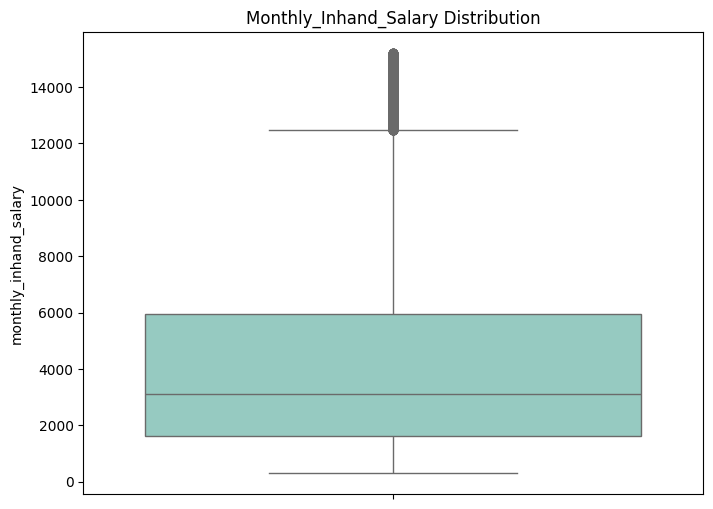

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="monthly_inhand_salary", palette="Set3")
plt.title("Monthly_Inhand_Salary Distribution")
plt.show()

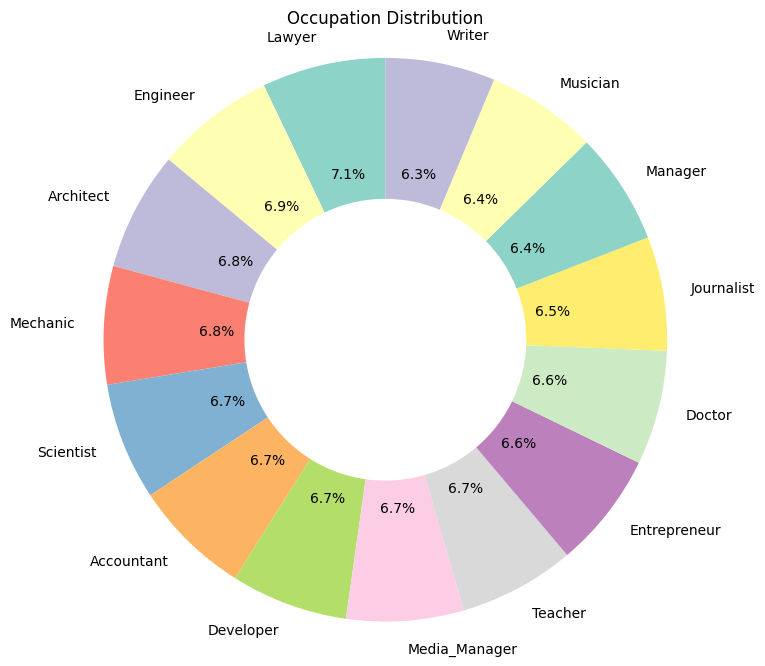

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(df["occupation"].value_counts(),
        labels=df["occupation"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Occupation Distribution")
plt.axis('equal')
plt.show()

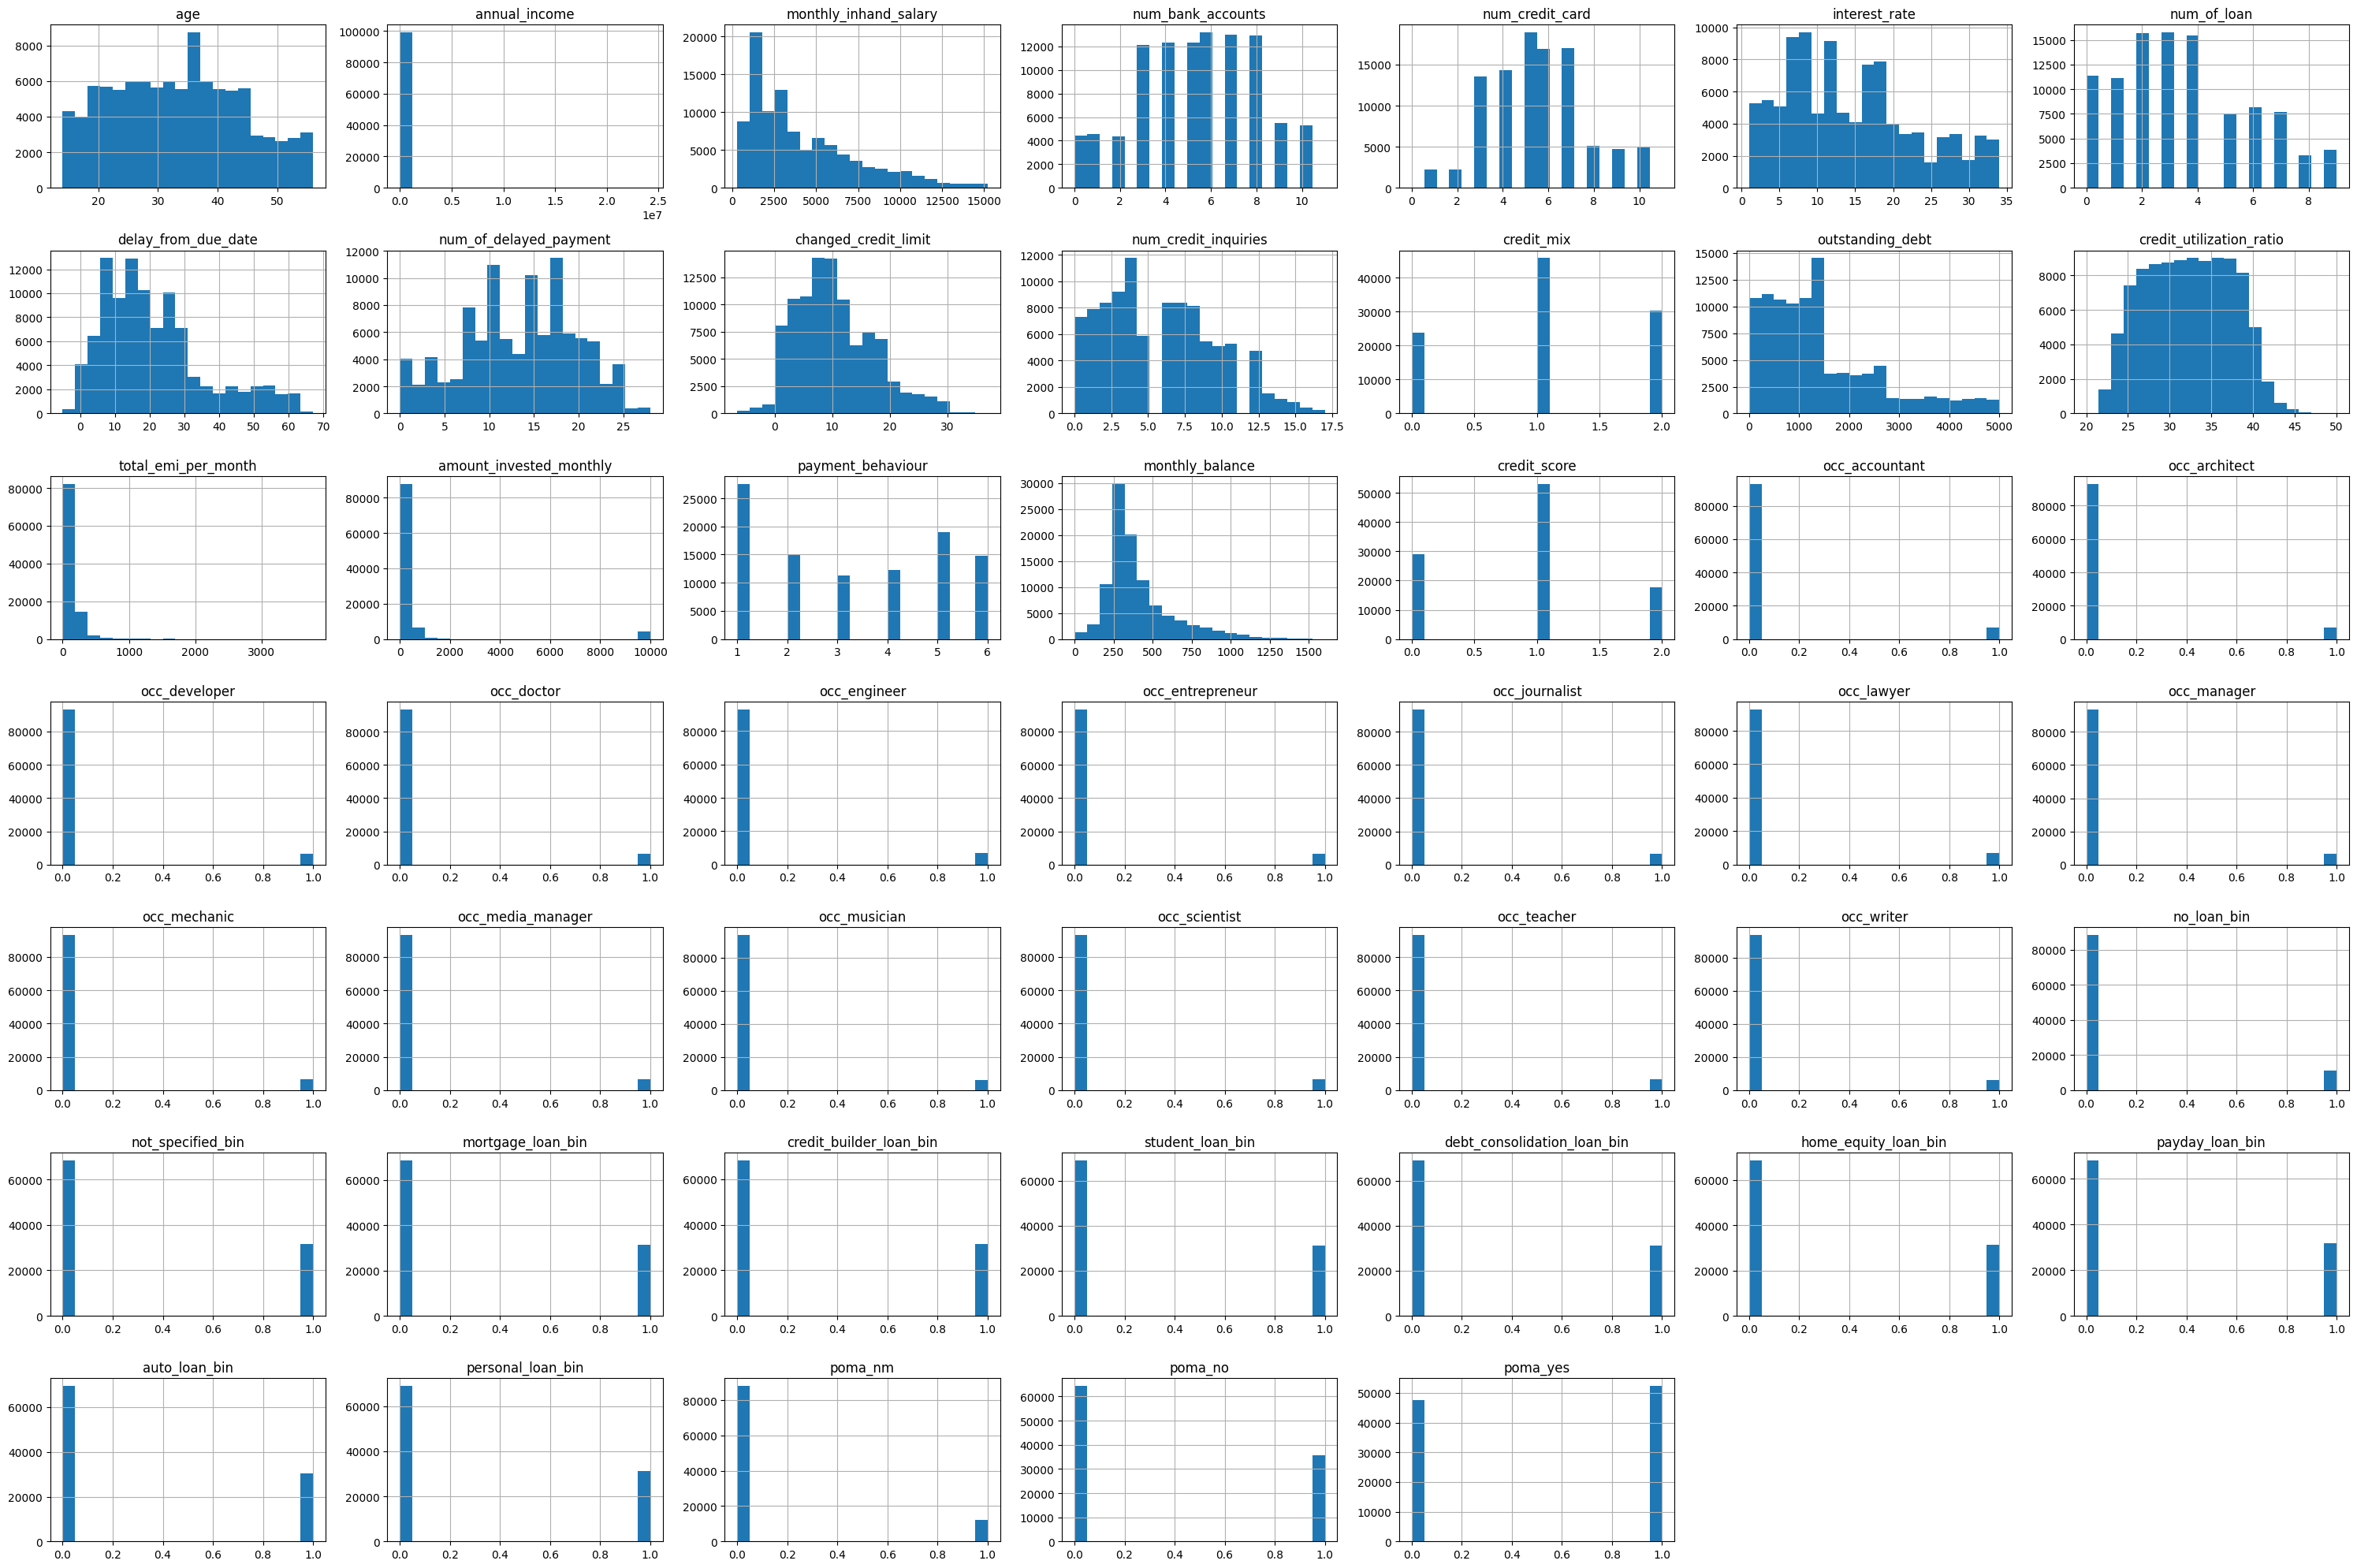

In [77]:
df.hist(bins=20, figsize=(30, 20))
plt.tight_layout()
plt.show()

In [78]:
col_to_drop = ["id", "customer_id", "month", "name", "ssn", "type_of_loan", "occupation", "delay_from_due_date", "payment_of_min_amount", "credit_history_age"]
df = df.drop(col_to_drop, axis=1)
df.to_csv("preprocessed_credit_score_dataset.csv")

## Classification

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("./preprocessed_credit_score_dataset.csv")

In [81]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(df.drop(columns=["credit_score"]),
                                                                    df["credit_score"],
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler

def standard_scaling(X_train, X_test, col):
    scaler = StandardScaler()
    X_train[[col]] = scaler.fit_transform(X_train[[col]])
    X_test[[col]] = scaler.transform(X_test[[col]])

scaling_columns = [
    'age',
    'annual_income',
    'monthly_inhand_salary',
    'num_bank_accounts',
    'num_credit_card',
    'interest_rate',
    'num_of_loan',
    'num_of_delayed_payment',
    'changed_credit_limit',
    'num_credit_inquiries',
    'outstanding_debt',
    'credit_utilization_ratio',
    'total_emi_per_month',
    'amount_invested_monthly',
    'monthly_balance'
 ]

for col in scaling_columns:
    standard_scaling(train_data, test_data, col)

In [83]:
from sklearn import metrics

def print_bin_classification_metrics(test_labels, predicted_labels, average='macro', prefix=""):
    # Model Accuracy: how often is the classifier correct?
    accuracy = metrics.accuracy_score(test_labels, predicted_labels)
    # Model Precision: what percentage of positive tuples are labeled as such?
    precision = metrics.precision_score(
        test_labels, predicted_labels, average=average)
    # Model Recall: what percentage of positive tuples are labelled as such?
    recall = metrics.recall_score(
        test_labels, predicted_labels, average=average)
    # Model F1: weighted average of precision and recall
    F1 = metrics.f1_score(test_labels, predicted_labels, average=average)
    print(prefix+"Accuracy:", "{:.5f}".format(accuracy), "Precision:", "{:.5f}".format(
        precision), "Recall:", "{:.5f}".format(recall), "F1:", "{:.5f}".format(F1))

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_data, train_labels)
predicted_train = dt.predict(train_data)
predicted = dt.predict(test_data)
print_bin_classification_metrics(test_labels, predicted)

Accuracy: 0.73900 Precision: 0.72677 Recall: 0.72616 F1: 0.72646


In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_data, train_labels)
predicted_train = rf.predict(train_data)
predicted = rf.predict(test_data)
print_bin_classification_metrics(test_labels, predicted)

Accuracy: 0.81095 Precision: 0.80348 Recall: 0.80434 F1: 0.80372


In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_data, train_labels)
predicted_train = knn.predict(train_data)
predicted = knn.predict(test_data)
print_bin_classification_metrics(test_labels, predicted)

Accuracy: 0.70695 Precision: 0.70040 Recall: 0.65511 F1: 0.66929


## Nested k-fold cross validation

In [87]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()

X = train_data.to_numpy()
y = train_labels.to_numpy()

p_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],

}

for train_ix, test_ix in cv_outer.split(train_data):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = DecisionTreeClassifier(random_state=1)
	# define search
	search = GridSearchCV(model, p_grid, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result and print
	outer_results.append(acc)
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>acc=0.736, est=0.709, cfg={'criterion': 'entropy', 'max_depth': None}
>acc=0.732, est=0.713, cfg={'criterion': 'gini', 'max_depth': None}
>acc=0.736, est=0.712, cfg={'criterion': 'entropy', 'max_depth': None}
>acc=0.730, est=0.713, cfg={'criterion': 'gini', 'max_depth': None}
>acc=0.734, est=0.713, cfg={'criterion': 'entropy', 'max_depth': None}
Accuracy: 0.733 (0.003)
